In [29]:
import pandas as pd
from scipy import stats


In [3]:
datafile = "PlantGrowth.csv"
data = pd.read_csv(datafile)
data

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


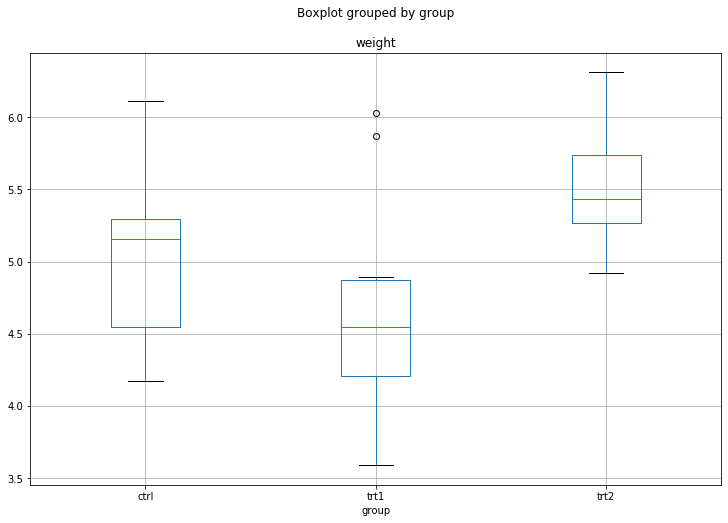

In [4]:
#Create a boxplot
data.boxplot('weight', by='group', figsize=(12, 8))

In [8]:
ctrl=data.weight[data.group=='ctrl']
ctrl

0    4.17
1    5.58
2    5.18
3    6.11
4    4.50
5    4.61
6    5.17
7    4.53
8    5.33
9    5.14
Name: weight, dtype: float64

In [10]:
grps = pd.unique(data.group.values)
grps

array(['ctrl', 'trt1', 'trt2'], dtype=object)

In [19]:
d_data = {grp:data['weight'][data.group == grp] for grp in grps}

{'ctrl': 0    4.17
 1    5.58
 2    5.18
 3    6.11
 4    4.50
 5    4.61
 6    5.17
 7    4.53
 8    5.33
 9    5.14
 Name: weight, dtype: float64,
 'trt1': 10    4.81
 11    4.17
 12    4.41
 13    3.59
 14    5.87
 15    3.83
 16    6.03
 17    4.89
 18    4.32
 19    4.69
 Name: weight, dtype: float64,
 'trt2': 20    6.31
 21    5.12
 22    5.54
 23    5.50
 24    5.37
 25    5.29
 26    4.92
 27    6.15
 28    5.80
 29    5.26
 Name: weight, dtype: float64}

In [28]:
k = len(pd.unique(data.group))  # number of conditions
N = len(data.values)  # conditions times participants
n = data.groupby('group').size()[0] #Participants in each condition

METHOD 1

In [36]:
F, p = stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])

In [31]:
F

4.846087862380136

In [32]:
p

0.0159099583256229

METHOD 2

In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('weight ~ group',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq    df         F   PR(>F)
group      3.76634   2.0  4.846088  0.01591
Residual  10.49209  27.0       NaN      NaN


METHOD 3

In [37]:
import pingouin as pg

In [39]:
aov = pg.anova(data=data, dv='weight', between='group', detailed=True)
print(aov)

   Source        SS  DF        MS         F    p-unc       np2
0   group   3.76634   2  1.883170  4.846088  0.01591  0.264148
1  Within  10.49209  27  0.388596       NaN      NaN       NaN
